### Mycardial Infraction prediction on patients 


#### Dataset
This dataset is used to predict complications of Myocardial Infarction (MI) based on the information about the patient. The target value 0 is no complication and 1 means complication within the first three days of hospitalization. 

MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.

* Age
* Gender
* Myocardial:  Quantity of myocardial infarctions in the anamnesis – Ordinal
* Exertional angina: Exertional angina pectoris in the anamnesis
* FC: Functional class (FC) of angina pectoris in the last year – Ordinal
* Heart Disease: Coronary heart disease (CHD) in recent weeks, days before admission to hospital
* Heredity: Heredity on CHD
* Hypertension: Presence of an essential hypertension
* Symptomatic hypertension
* Duration: Duration of arterial hypertension
* Arrhythmia: Observing of arrhythmia in the anamnesis
* Systolic_emergency: Systolic blood pressure according to Emergency Cardiology Team
* Diastolic_emergency: Diastolic blood pressure according to Emergency Cardiology Team
* Systolic_intensive_care: Systolic blood pressure according to intensive care unit
* Diastolic_intensive_care: Diastolic blood pressure according to intensive care unit
* Potassium: Serum potassium content
* Sodium: Serum sodium content
* AlAT: Serum AlAT content
* AsTK: Serum AsTK content
* WBC: White Blood Cell Count
* ESR: Erythrocyte sedimentation rate
* Time: Time elapsed from the beginning of the attack of CHD to the hospital
* Outcome: target column

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1275 non-null   object
 1   Gender                    1275 non-null   object
 2   myocardial                1275 non-null   object
 3   Exertional angina         1275 non-null   object
 4   FC                        1275 non-null   object
 5   Heart Disease             1275 non-null   object
 6   Heredity                  1275 non-null   object
 7   Hypertension              1275 non-null   object
 8   Symptomatic hypertension  1275 non-null   object
 9   Duration                  1275 non-null   object
 10  Arrhythmia                1275 non-null   object
 11  Systolic_emergency        1275 non-null   object
 12  Diastolic_emergency       1275 non-null   object
 13  Systolic_intensive_care   1275 non-null   object
 14  Diastolic_intensive_care

We can see that all the columns are of type object and hence we don't see any missing values here. 

In [4]:
train.head()

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Heredity,Hypertension,Symptomatic hypertension,Duration,...,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
0,75,Female,0,Two years ago,II FC,Exertional angina,?,Stage 2,No,?,...,140,90,?,?,0.3,0.18,7.8,16,7,0
1,50,Male,1,Two years ago,II FC,Unstable angina,?,Stage 2,No,One year,...,?,?,3.9,132,0.23,0.52,6.2,20,7,0
2,54,Male,0,Never,No angina,No angina,?,No,No,No hypertension,...,140,100,?,?,?,?,6.9,6,?,0
3,51,Male,?,?,?,Unstable angina,?,?,?,?,...,0,0,?,?,?,?,?,?,2,1
4,76,Female,3,Never,No angina,Unstable angina,?,Stage 2,No,More than 10 years,...,110,70,?,?,0.15,0.26,4,5,7,0


From observing the top 5 rows, we see that a lot of columns have '?' in it indicating missing values. 

#### Replacing ? with NaN 

Replacing '?' across the columns as NaN

In [5]:
for col in train.columns:
    train[col] = train[col].replace('?',np.nan) 

Converting numerical columns to float 

In [6]:
train['Age'] = train['Age'].astype(float)
train['myocardial'] = train['myocardial'].astype(float)

In [7]:
train[train.columns[11:22]] = train[train.columns[11:22]].astype(float)

In [8]:
train.describe()

,Age,myocardial,Systolic_emergency,Diastolic_emergency,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
count,1274.000000,1274.00000,474.000000,474.000000,1066.000000,1066.000000,993.000000,992.000000,1067.000000,1066.000000,1188.000000,1132.000000,1178.000000,1275.000000
mean,64.154631,0.56044,137.700422,82.004219,134.812383,83.076923,4.194361,136.607863,0.472671,0.262336,8.843519,13.475265,4.702037,0.160784
std,46.793076,0.83419,34.681988,19.997145,31.734114,18.631784,0.770440,6.598662,0.386188,0.206220,3.449176,10.796416,2.858370,0.367476
min,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.300000,117.000000,0.030000,0.040000,2.000000,1.000000,1.000000,0.000000
25%,54.000000,0.00000,120.000000,70.000000,120.000000,80.000000,3.700000,133.000000,0.230000,0.150000,6.400000,5.000000,2.000000,0.000000
50%,63.000000,0.00000,140.000000,80.000000,130.000000,80.000000,4.100000,136.000000,0.380000,0.220000,8.100000,10.000000,4.000000,0.000000
75%,70.000000,1.00000,160.000000,90.000000,150.000000,90.000000,4.600000,140.000000,0.610000,0.300000,10.500000,19.000000,7.000000,0.000000
max,999.000000,3.00000,260.000000,190.000000,260.000000,190.000000,8.000000,169.000000,3.000000,2.150000,27.900000,68.000000,9.000000,1.000000


#### Replacing 999 in the Age column as NaN

In [9]:
train['Age'] = train['Age'].replace(999,np.nan)

In [10]:
train.describe()

,Age,myocardial,Systolic_emergency,Diastolic_emergency,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
count,1271.000000,1274.00000,474.000000,474.000000,1066.000000,1066.000000,993.000000,992.000000,1067.000000,1066.000000,1188.000000,1132.000000,1178.000000,1275.000000
mean,61.948072,0.56044,137.700422,82.004219,134.812383,83.076923,4.194361,136.607863,0.472671,0.262336,8.843519,13.475265,4.702037,0.160784
std,11.201609,0.83419,34.681988,19.997145,31.734114,18.631784,0.770440,6.598662,0.386188,0.206220,3.449176,10.796416,2.858370,0.367476
min,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.300000,117.000000,0.030000,0.040000,2.000000,1.000000,1.000000,0.000000
25%,54.000000,0.00000,120.000000,70.000000,120.000000,80.000000,3.700000,133.000000,0.230000,0.150000,6.400000,5.000000,2.000000,0.000000
50%,63.000000,0.00000,140.000000,80.000000,130.000000,80.000000,4.100000,136.000000,0.380000,0.220000,8.100000,10.000000,4.000000,0.000000
75%,70.000000,1.00000,160.000000,90.000000,150.000000,90.000000,4.600000,140.000000,0.610000,0.300000,10.500000,19.000000,7.000000,0.000000
max,92.000000,3.00000,260.000000,190.000000,260.000000,190.000000,8.000000,169.000000,3.000000,2.150000,27.900000,68.000000,9.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1271 non-null   float64
 1   Gender                    1275 non-null   object 
 2   myocardial                1274 non-null   float64
 3   Exertional angina         1202 non-null   object 
 4   FC                        1225 non-null   object 
 5   Heart Disease             1235 non-null   object 
 6   Heredity                  57 non-null     object 
 7   Hypertension              1271 non-null   object 
 8   Symptomatic hypertension  1272 non-null   object 
 9   Duration                  1085 non-null   object 
 10  Arrhythmia                1261 non-null   object 
 11  Systolic_emergency        474 non-null    float64
 12  Diastolic_emergency       474 non-null    float64
 13  Systolic_intensive_care   1066 non-null   float64
 14  Diastoli

#### Test dataset

In [12]:
for col in test.columns:
    test[col] = test[col].replace('?',np.nan) 

#Converting numerical columns to float 

test['Age'] = test['Age'].astype(float)
test['myocardial'] = test['myocardial'].astype(float)

test[test.columns[11:22]] = test[test.columns[11:22]].astype(float)

In [13]:
test['Age'] = test['Age'].replace(999,np.nan)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       421 non-null    float64
 1   Gender                    425 non-null    object 
 2   myocardial                422 non-null    float64
 3   Exertional angina         392 non-null    object 
 4   FC                        402 non-null    object 
 5   Heart Disease             414 non-null    object 
 6   Heredity                  15 non-null     object 
 7   Hypertension              420 non-null    object 
 8   Symptomatic hypertension  420 non-null    object 
 9   Duration                  367 non-null    object 
 10  Arrhythmia                418 non-null    object 
 11  Systolic_emergency        150 non-null    float64
 12  Diastolic_emergency       150 non-null    float64
 13  Systolic_intensive_care   367 non-null    float64
 14  Diastolic_

### Exploratory analysis

Observing the Missing values

In [15]:
train.isnull().any(axis= 'columns').sum()

1267

In [16]:
train.isnull().sum()

Age                            4
Gender                         0
myocardial                     1
Exertional angina             73
FC                            50
Heart Disease                 40
Heredity                    1218
Hypertension                   4
Symptomatic hypertension       3
Duration                     190
Arrhythmia                    14
Systolic_emergency           801
Diastolic_emergency          801
Systolic_intensive_care      209
Diastolic_intensive_care     209
Potassium                    282
Sodium                       283
AlAT                         208
AsAT                         209
WBC                           87
ESR                          143
Time                          97
Outcome                        0
dtype: int64

#### Age

Text(0.5, 1.0, 'Age histogram')

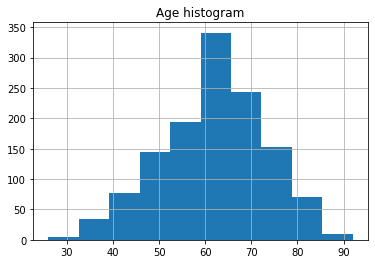

In [17]:
train.Age.hist()
plt.title('Age histogram')

The Age histogram is approximately normally distributed with Mean ~ 62 and Median ~ 63
and will hence use Median imputation 

In [18]:
train[['Age','Outcome']].groupby('Outcome').median()

,Age
Outcome,
0,62.0
1,67.0


We see that mean Age for people tested to have MI complication is greater than people who have no MI complication.

In [19]:
train[train['Age'].isnull()]

,Age,Gender,myocardial,Exertional angina,FC,Heart Disease,Heredity,Hypertension,Symptomatic hypertension,Duration,...,Systolic_intensive_care,Diastolic_intensive_care,Potassium,Sodium,AlAT,AsAT,WBC,ESR,Time,Outcome
248,NaN,Male,0.0,Two years ago,II FC,Unstable angina,NaN,Stage 2,No,More than 10 years,...,NaN,NaN,4.7,142.0,0.30,0.07,10.3,17.0,6.0,0
295,NaN,Male,0.0,Two years ago,II FC,Unstable angina,NaN,No,No,No hypertension,...,NaN,NaN,3.9,131.0,0.45,0.30,12.7,9.0,3.0,0
547,NaN,Female,2.0,More than five years ago,II FC,Exertional angina,NaN,Stage 2,No,Six to ten years,...,100.0,60.0,4.6,132.0,0.75,0.22,5.6,14.0,3.0,0
729,NaN,Male,0.0,Never,No angina,No angina,NaN,No,No,No hypertension,...,140.0,90.0,NaN,NaN,NaN,NaN,15.5,10.0,8.0,0


In [20]:
train[['Age','Gender']].groupby('Gender').median()

,Age
Gender,
Female,68.0
Male,59.0


Median age in the dataset for Female is 68 and Male is 59.

Age imputation will be done maintaining this distribution

In [21]:
train['Age'] = train['Age'].fillna(train.groupby('Gender')['Age'].transform('median'))

In [22]:
test['Age'] = test['Age'].fillna(train.groupby('Gender')['Age'].transform('median'))

#### Gender

<AxesSubplot:title={'center':'Gender counts'}>

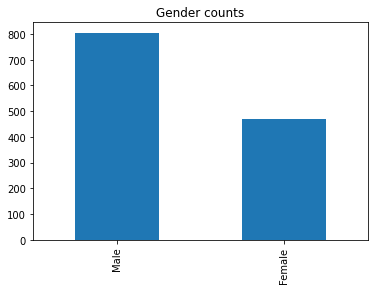

In [23]:
train.Gender.value_counts().plot(kind = 'bar', title = 'Gender counts')

We can see that there are more Male than Female in the dataset.
Mapping Male to 1 and Female to 0

In [24]:
train['Gender']=train['Gender'].map({'Female':0,'Male':1}).astype(int)

In [25]:
test['Gender']=test['Gender'].map({'Female':0,'Male':1}).astype(int)

#### Myocardial - ordinal 

<AxesSubplot:title={'center':'Myocardial counts'}>

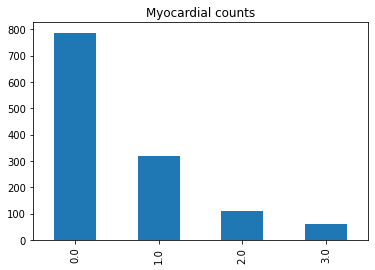

In [26]:
train['myocardial'].value_counts().plot(kind = 'bar', title = 'Myocardial counts')

We see that 0 is the dominant value

Examining Heart Disease and Myocardial value to check if it has a variation.

In [27]:
train[['Heart Disease','myocardial']].groupby('Heart Disease').agg(pd.Series.mode)

,myocardial
Heart Disease,
Exertional angina,0.0
No angina,0.0
Unstable angina,0.0


We don't see a difference and is hence not useful.

Imputing mode = 0 to the missing value

In [28]:
train['myocardial'] = train['myocardial'].fillna(0).astype(int)

In [29]:
test['myocardial'] = test['myocardial'] .fillna(0).astype(int)

#### Exertional Angina

In [30]:
train['Exertional angina'].value_counts()

Never                       504
More than five years ago    254
During the last year        105
One year ago                103
Two years ago                92
Four to five years ago       91
Three years ago              53
Name: Exertional angina, dtype: int64

<AxesSubplot:title={'center':'Exertional Angina counts'}>

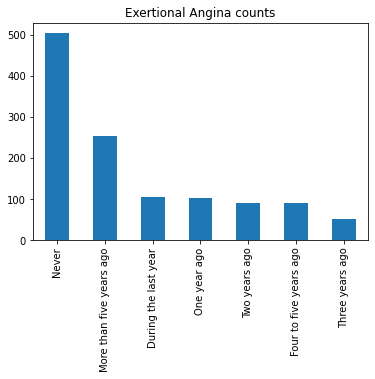

In [31]:
train['Exertional angina'].value_counts().plot(kind = 'bar', title = 'Exertional Angina counts')

In [32]:
#mode imputation and one-hot vector encoding - train data
train['Exertional angina'].replace(np.NaN, 'Never', inplace = True)

In [33]:
cols = pd.get_dummies(train['Exertional angina'], prefix = 'Exertionalangina')
train[cols.columns] = cols
train.drop('Exertional angina', axis = 1, inplace = True)

In [34]:
#mode imputation and one-hot vector encoding - test data
test['Exertional angina'].replace(np.NaN, 'Never', inplace = True)

In [35]:
cols = pd.get_dummies(test['Exertional angina'],prefix = 'Exertionalangina')
test[cols.columns] = cols
test.drop('Exertional angina', axis = 1, inplace = True)

#### Functional Class - ordinal

In [36]:
train['FC'].value_counts()

II FC        639
No angina    503
III FC        38
I FC          37
IV FC          8
Name: FC, dtype: int64

<AxesSubplot:title={'center':'Functional class count'}>

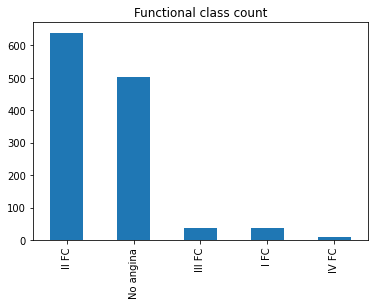

In [37]:
train['FC'].value_counts().plot(kind = 'bar', title = 'Functional class count')

Replacing NaN with most frequent value and mapping the categorical value to numerical,thereby making it ordinal

In [38]:
train['FC'].replace(np.NaN, 'II FC', inplace = True)

In [39]:
train['FC'] = train['FC'].map({'No angina':0,
                              'I FC':1,
                              'II FC':2,
                              'III FC':3,
                              'IV FC':4 }).astype(int)

In [40]:
test['FC'].replace(np.NaN, 'II FC', inplace = True)

In [41]:
test['FC'] = test['FC'].map({'No angina':0,
                              'I FC':1,
                              'II FC':2,
                              'III FC':3,
                              'IV FC':4 }).astype(int)

#### Heart Disease

<AxesSubplot:title={'center':'Heart Disease counts'}>

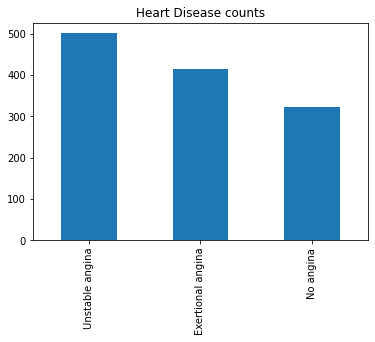

In [42]:
train['Heart Disease'].value_counts().plot(kind = 'bar', title = 'Heart Disease counts' )

Replacing NaN with most common category and one-hot encoding the column

In [43]:
train['Heart Disease'].fillna('Unstable angina', inplace = True)

In [44]:
cols = pd.get_dummies(train['Heart Disease'], prefix = 'HeartDisease')
train[cols.columns] = cols
train.drop('Heart Disease', axis = 1, inplace = True)

In [45]:
test['Heart Disease'].fillna('Unstable angina', inplace = True)

In [46]:
cols = pd.get_dummies(test['Heart Disease'], prefix = 'HeartDisease')
test[cols.columns] = cols
test.drop('Heart Disease', axis = 1, inplace = True)

#### Hypertension

In [47]:
train['Hypertension'].unique()

array(['Stage 2', 'No', nan, 'Stage 3', 'Stage 1'], dtype=object)

In [48]:
train['Hypertension'].value_counts()

Stage 2    670
No         445
Stage 3    148
Stage 1      8
Name: Hypertension, dtype: int64

In [49]:
train['Hypertension'].fillna('Stage 2', inplace = True)

In [50]:
cols = pd.get_dummies(train['Hypertension'], prefix = 'Hypertension')
train[cols.columns] = cols
train.drop('Hypertension', axis = 1, inplace = True)

In [51]:
test['Hypertension'].fillna('Stage 2', inplace = True)

In [52]:
cols = pd.get_dummies(test['Hypertension'],prefix = 'Hypertension')
test[cols.columns] = cols
test.drop('Hypertension', axis = 1, inplace = True)

#### Symptomatic hypertension

In [53]:
train['Symptomatic hypertension'].unique()

array(['No', nan, 'Yes'], dtype=object)

<AxesSubplot:title={'center':'Symptomatic Hypertension count'}>

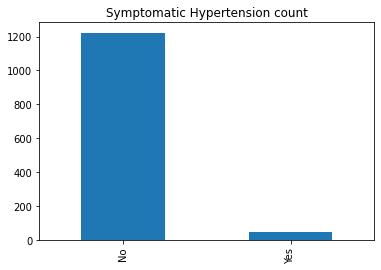

In [54]:
train['Symptomatic hypertension'].value_counts().plot(kind = 'bar', title = 'Symptomatic Hypertension count')

Most of the values are No. Replacing NA's with 'No' and encoding most frequent value 'No' as 1 and 'Yes' as 0

In [55]:
train['Symptomatic hypertension'].fillna('No', inplace = True)

In [56]:
train['Symptomatic hypertension'] = train['Symptomatic hypertension'].map({'No':1,'Yes':0})

In [57]:
test['Symptomatic hypertension'].fillna('No', inplace = True)

In [58]:
test['Symptomatic hypertension'] = test['Symptomatic hypertension'].map({'No':1,'Yes':0})

In [59]:
test['Symptomatic hypertension'].value_counts()

1    417
0      8
Name: Symptomatic hypertension, dtype: int64

#### Duration

In [60]:
train['Duration'].unique()

array([nan, 'One year', 'No hypertension', 'More than 10 years',
       'Six to ten years', 'Three years', 'Five years', 'Four years',
       'Two years'], dtype=object)

<AxesSubplot:title={'center':'Duration counts'}>

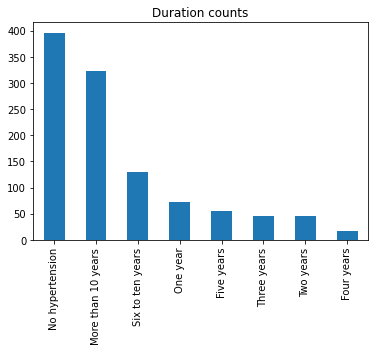

In [61]:
train['Duration'].value_counts().plot(kind = 'bar', title = 'Duration counts')

Replacing NAs with 'No hypertension' and one-hot encoding the column

In [62]:
train['Duration'].fillna('No hypertension', inplace = True)

In [63]:
cols = pd.get_dummies(train['Duration'],prefix = 'Duration')
train[cols.columns] = cols
train.drop('Duration', axis = 1, inplace = True)

In [64]:
test['Duration'].fillna('No hypertension', inplace = True)

In [65]:
cols = pd.get_dummies(test['Duration'],prefix = 'Duration')
test[cols.columns] = cols
test.drop('Duration', axis = 1, inplace = True)

#### Arrhythmia

In [66]:
train['Arrhythmia'].unique()

array(['No', nan, 'Yes'], dtype=object)

<AxesSubplot:title={'center':'Arrhythmia counts'}>

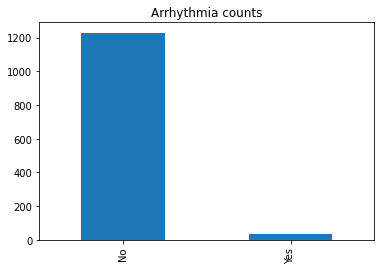

In [67]:
train['Arrhythmia'].value_counts().plot(kind = 'bar', title = 'Arrhythmia counts')

Replacing NAs with 'No' and mapping 'No' to 1 and 'Yes' to 0

In [68]:
train['Arrhythmia'].fillna('No', inplace = True) 

In [69]:
train['Arrhythmia']= train['Arrhythmia'].map({'No':1,'Yes':0})

In [70]:
test['Arrhythmia'].fillna('No', inplace = True) 

In [71]:
test['Arrhythmia']= test['Arrhythmia'].map({'No':1,'Yes':0})

#### Systolic intensive care

In [72]:
train['Systolic_intensive_care'].describe()

count    1066.000000
mean      134.812383
std        31.734114
min         0.000000
25%       120.000000
50%       130.000000
75%       150.000000
max       260.000000
Name: Systolic_intensive_care, dtype: float64

<AxesSubplot:>

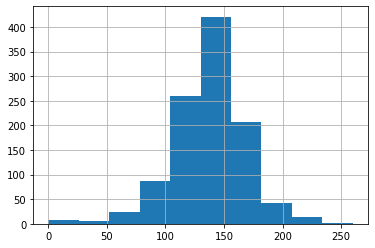

In [73]:
train['Systolic_intensive_care'].hist()

Replacing NAs with Median

In [74]:
train['Systolic_intensive_care'].fillna(train['Systolic_intensive_care'].median(), inplace = True)

In [75]:
test['Systolic_intensive_care'].fillna(train['Systolic_intensive_care'].median(), inplace = True)

#### Diastolic intensive care

In [76]:
train['Diastolic_intensive_care'].describe()

count    1066.000000
mean       83.076923
std        18.631784
min         0.000000
25%        80.000000
50%        80.000000
75%        90.000000
max       190.000000
Name: Diastolic_intensive_care, dtype: float64

<AxesSubplot:>

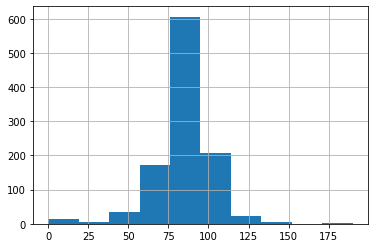

In [77]:
train['Diastolic_intensive_care'].hist()

Replacing NAs with median

In [78]:
train['Diastolic_intensive_care'].fillna(train['Diastolic_intensive_care'].median(), inplace = True)

In [79]:
test['Diastolic_intensive_care'].fillna(train['Diastolic_intensive_care'].median(), inplace = True)

#### Potassium

In [80]:
train['Potassium'].describe()

count    993.000000
mean       4.194361
std        0.770440
min        2.300000
25%        3.700000
50%        4.100000
75%        4.600000
max        8.000000
Name: Potassium, dtype: float64

<AxesSubplot:>

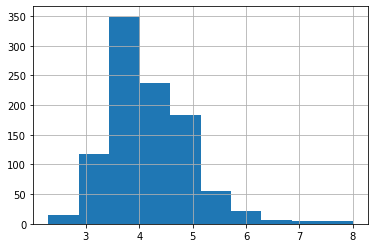

In [81]:
train['Potassium'].hist()

In [82]:
train['Potassium'].fillna(train['Potassium'].median(), inplace = True)

In [83]:
test['Potassium'].fillna(train['Potassium'].median(), inplace = True)

#### Sodium 

In [84]:
train['Sodium'].describe()

count    992.000000
mean     136.607863
std        6.598662
min      117.000000
25%      133.000000
50%      136.000000
75%      140.000000
max      169.000000
Name: Sodium, dtype: float64

<AxesSubplot:>

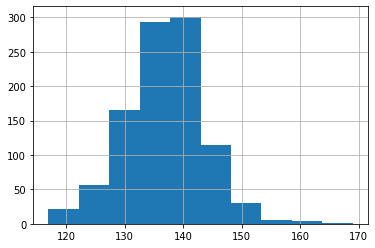

In [85]:
train['Sodium'].hist()

In [86]:
train['Sodium'].fillna(train['Sodium'].median(), inplace = True)

In [87]:
test['Sodium'].fillna(train['Sodium'].median(), inplace = True)

#### AlAT

In [88]:
train['AlAT'].describe()

count    1067.000000
mean        0.472671
std         0.386188
min         0.030000
25%         0.230000
50%         0.380000
75%         0.610000
max         3.000000
Name: AlAT, dtype: float64

<AxesSubplot:>

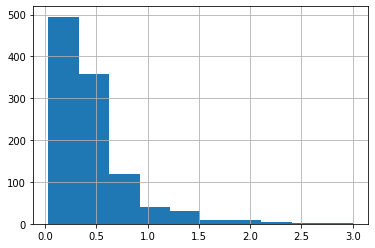

In [89]:
train['AlAT'].hist()

In [90]:
train['AlAT'].fillna(train['AlAT'].median(), inplace = True)

In [91]:
test['AlAT'].fillna(train['AlAT'].median(), inplace = True)

#### AsTK

In [92]:
train['AsAT'].describe()

count    1066.000000
mean        0.262336
std         0.206220
min         0.040000
25%         0.150000
50%         0.220000
75%         0.300000
max         2.150000
Name: AsAT, dtype: float64

<AxesSubplot:>

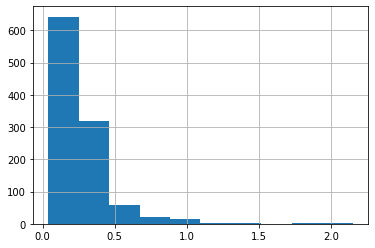

In [93]:
train['AsAT'].hist()

In [94]:
train['AsAT'].fillna(train['AsAT'].median(), inplace = True)

In [95]:
test['AsAT'].fillna(train['AsAT'].median(), inplace = True)

#### WBC

In [96]:
train['WBC'].describe()

count    1188.000000
mean        8.843519
std         3.449176
min         2.000000
25%         6.400000
50%         8.100000
75%        10.500000
max        27.900000
Name: WBC, dtype: float64

<AxesSubplot:>

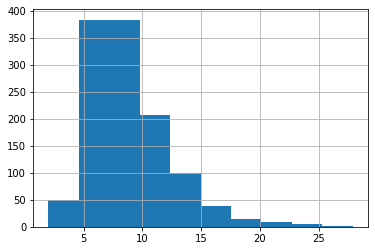

In [97]:
train['WBC'].hist()

In [98]:
train['WBC'].fillna(train['WBC'].median(), inplace = True)

In [99]:
test['WBC'].fillna(train['WBC'].median(), inplace = True)

#### ESR

In [100]:
train['ESR'].describe()

count    1132.000000
mean       13.475265
std        10.796416
min         1.000000
25%         5.000000
50%        10.000000
75%        19.000000
max        68.000000
Name: ESR, dtype: float64

<AxesSubplot:>

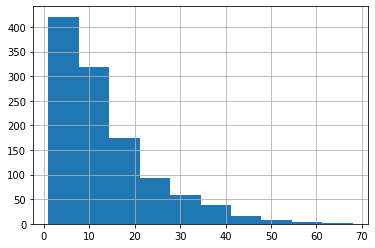

In [101]:
train['ESR'].hist()

In [102]:
train['ESR'].fillna(train['ESR'].median(), inplace = True)

In [103]:
test['ESR'].fillna(train['ESR'].median(), inplace = True)

#### Time

In [104]:
train['Time'].describe()

count    1178.000000
mean        4.702037
std         2.858370
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: Time, dtype: float64

<AxesSubplot:>

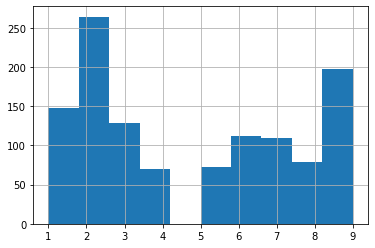

In [105]:
train['Time'].hist()

In [106]:
train['Time'].fillna(train['Time'].median(), inplace = True)

In [107]:
test['Time'].fillna(train['Time'].median(), inplace = True)

#### Outcome

<AxesSubplot:title={'center':'Outcome Counts'}>

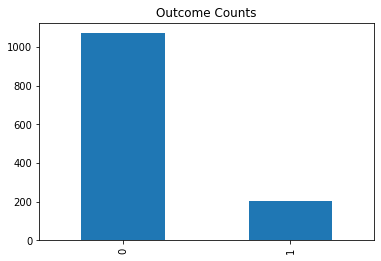

In [108]:
train['Outcome'].value_counts().plot(kind = 'bar', title = 'Outcome Counts')

We see that the value 0 is dominant, i.e., there are more 0's than 1's and the data is an unbalanced dataset

#### Dropping other columns having more than 60% missing values

#### Heredity

In [109]:

train.drop('Heredity', axis = 1, inplace = True)

test.drop('Heredity', axis = 1, inplace = True)

#### Systolic emergency

In [110]:
train.drop('Systolic_emergency', axis = 1, inplace = True)

In [111]:
test.drop('Systolic_emergency', axis = 1, inplace = True)

#### Diastolic emergency

In [112]:
train.drop('Diastolic_emergency', axis = 1, inplace = True)

In [113]:
test.drop('Diastolic_emergency', axis = 1, inplace = True)

### Final test dataset with no missing values

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        425 non-null    float64
 1   Gender                                     425 non-null    int64  
 2   myocardial                                 425 non-null    int64  
 3   FC                                         425 non-null    int64  
 4   Symptomatic hypertension                   425 non-null    int64  
 5   Arrhythmia                                 425 non-null    int64  
 6   Systolic_intensive_care                    425 non-null    float64
 7   Diastolic_intensive_care                   425 non-null    float64
 8   Potassium                                  425 non-null    float64
 9   Sodium                                     425 non-null    float64
 10  AlAT                      

### Final train dataset with no missing values

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        1275 non-null   float64
 1   Gender                                     1275 non-null   int64  
 2   myocardial                                 1275 non-null   int64  
 3   FC                                         1275 non-null   int64  
 4   Symptomatic hypertension                   1275 non-null   int64  
 5   Arrhythmia                                 1275 non-null   int64  
 6   Systolic_intensive_care                    1275 non-null   float64
 7   Diastolic_intensive_care                   1275 non-null   float64
 8   Potassium                                  1275 non-null   float64
 9   Sodium                                     1275 non-null   float64
 10  AlAT                    

array([[<AxesSubplot:xlabel='Systolic_intensive_care', ylabel='Systolic_intensive_care'>,
        <AxesSubplot:xlabel='Diastolic_intensive_care', ylabel='Systolic_intensive_care'>,
        <AxesSubplot:xlabel='Potassium', ylabel='Systolic_intensive_care'>,
        <AxesSubplot:xlabel='Sodium', ylabel='Systolic_intensive_care'>,
        <AxesSubplot:xlabel='AlAT', ylabel='Systolic_intensive_care'>],
       [<AxesSubplot:xlabel='Systolic_intensive_care', ylabel='Diastolic_intensive_care'>,
        <AxesSubplot:xlabel='Diastolic_intensive_care', ylabel='Diastolic_intensive_care'>,
        <AxesSubplot:xlabel='Potassium', ylabel='Diastolic_intensive_care'>,
        <AxesSubplot:xlabel='Sodium', ylabel='Diastolic_intensive_care'>,
        <AxesSubplot:xlabel='AlAT', ylabel='Diastolic_intensive_care'>],
       [<AxesSubplot:xlabel='Systolic_intensive_care', ylabel='Potassium'>,
        <AxesSubplot:xlabel='Diastolic_intensive_care', ylabel='Potassium'>,
        <AxesSubplot:xlabel='Potassium

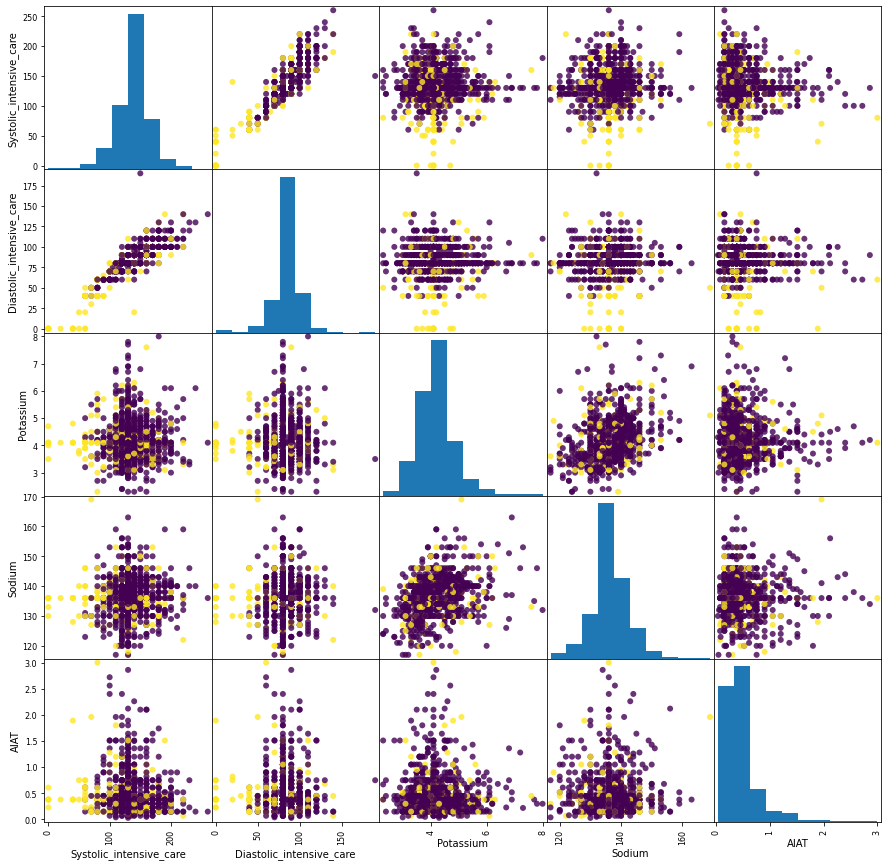

In [116]:
#Visualizing few columns

from pandas.plotting import scatter_matrix
X = train.drop('Outcome', axis = 1)
y = train['Outcome']

attributes = X.columns[6:11]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

# Machine learning models

Since the dataset is unbalanced with the Outcome variable having less 1's and more 0's, accuracy will not be a good predictor. 

Recall oriented scoring such as F1 or ROC AUC will be needed.

ROC AUC scoring will be used for model evaluation.

In [117]:
X = train.drop('Outcome', axis = 1)
y = train['Outcome']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_val_org, y_train, y_val = train_test_split(X,y, random_state = 0)

In [119]:
#Scaling the dataset using MinMax Scaler

scaler = MinMaxScaler()
colnames = X.columns
X_train = scaler.fit_transform(X_train_org)
X_val = scaler.transform(X_val_org)
test_data = scaler.transform(test)

### KNN Classifier

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = { 'n_neighbors' : range(1,20) }

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc').fit(X_train,y_train)

In [121]:
print('Cross validation score : ',grid_search.best_score_)
print('Best parameters : ',grid_search.best_params_)

Cross validation score :  0.6725050403225807
Best parameters :  {'n_neighbors': 14}


### Logistic 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid1 = { 'C' : [0.01,0.1,1,10,100],
              'max_iter' : [100,250,500]}

logit = LogisticRegression(solver = 'lbfgs',random_state = 0)
grid_log = GridSearchCV(logit, param_grid1, cv = 5, scoring = 'roc_auc', n_jobs = -1).fit(X_train,y_train)


In [123]:
print('Best parameters',grid_log.best_params_)
print('Best ROC_AUC score', grid_log.best_score_)

Best parameters {'C': 1, 'max_iter': 100}
Best ROC_AUC score 0.7442716733870969


### Support Vector Classifier

In [124]:
from sklearn.svm import SVC

param_grid3 = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

rbf = SVC(kernel = 'rbf', random_state = 0)

grid_rbf = GridSearchCV(rbf, param_grid3,cv =5, n_jobs = -1, scoring = 'roc_auc').fit(X_train,y_train)


In [125]:
print('Best parameters:', grid_rbf.best_params_)
print('Best AUC ROC score : ', grid_rbf.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1}
Best AUC ROC score :  0.7363193044354839


### Decision Tree Classifier

In [126]:
from sklearn.tree import DecisionTreeClassifier

param_grid4 = {'max_depth': [2,3,4,5,6,7,8,9,10,11] }

tree = DecisionTreeClassifier(random_state = 0)

grid_tree = GridSearchCV(tree, param_grid4,cv =5, n_jobs = -1, scoring = 'roc_auc').fit(X_train,y_train)

In [127]:
print('Best parameters:', grid_tree.best_params_)
print('Best AUC ROC score : ', grid_tree.best_score_)

Best parameters: {'max_depth': 5}
Best AUC ROC score :  0.696522177419355


### Bagging Classifier

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

param_grid = {'max_samples':[0.01, 0.05, 0.1,0.5,1], 
              'max_features':[0.01, 0.05, 0.1,0.5,1],
             'bootstrap' : [True, False]}

log = LogisticRegression(C = 1, max_iter = 100,penalty = 'l2', solver = 'lbfgs', random_state = 0)
bg = BaggingClassifier(log, random_state = 0)
grid_bg = GridSearchCV(bg, param_grid = param_grid, cv = 5,scoring='roc_auc', n_jobs = -1).fit(X_train,y_train)

In [129]:
print('Best parameters:', grid_bg.best_params_)
print('Best AUC ROC score : ', grid_bg.best_score_)

Best parameters: {'bootstrap': False, 'max_features': 0.1, 'max_samples': 0.5}
Best AUC ROC score :  0.7519468245967742


### Gradient Boosting Classifier 

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid2 = {'learning_rate':[0.001, 0.01, 0.1,0.5],
              'n_estimators':[100,200, 500, 1000],
              'max_depth' : [2,3,4,5]}

gbrt = GradientBoostingClassifier(random_state=0)
grid_gb = GridSearchCV(gbrt, param_grid2 ,cv = 5, scoring = 'roc_auc', n_jobs = -1).fit(X_train,y_train)

In [131]:
print('Best parameters:', grid_gb.best_params_)
print('Best AUC ROC score : ', grid_gb.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Best AUC ROC score :  0.7859929435483871


# Best model

#### Out of the above models, Gradient Boosting Classifier produces the best cross validation ROC AUC score of 0.786 and is hence the best model. 

In [132]:
gbrt = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, 
                                  n_estimators = 500,random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=500,
                           random_state=0)

In [133]:
from sklearn.metrics import roc_auc_score
print('Train ROC AUC score : ', roc_auc_score(y_train, gbrt.predict(X_train)))
print('Validation ROC AUC score : ', roc_auc_score(y_val, gbrt.predict(X_val)))

Train ROC AUC score :  0.6147596153846154
Validation ROC AUC score :  0.6577097505668934


#### ROC AUC visualization

Train data ROC AUC curve

In [134]:
from sklearn import metrics

y_train_pred = gbrt.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

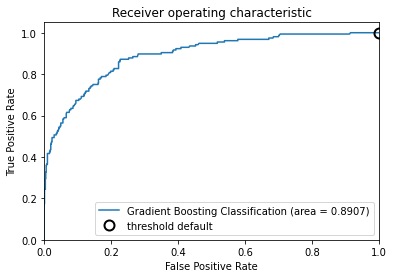

In [135]:
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classification (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold default", fillstyle="none", c='k', mew=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix -Train data

In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, gbrt.predict(X_train))

array([[799,   1],
       [120,  36]])

Test data ROC AUC curve

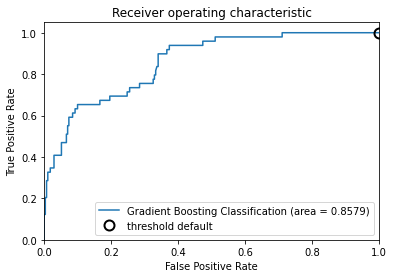

In [137]:
from sklearn import metrics

y_val_pred = gbrt.predict_proba(X_val)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classification (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold default", fillstyle="none", c='k', mew=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix -Validation data

In [138]:
confusion_matrix(y_val, gbrt.predict(X_val))

array([[267,   3],
       [ 33,  16]])

From the confusion matrix and ROC AUC curve with the default threshold, we see that the model is still unable to correctly predict the positives well, although the false positives is very low. 

Hence, fine tuning to move the threshold is needed to improve the model's performance.  

### Post prediction Model tuning

Since we are dealing with predicting patients with Acute myocardial infarction to reduce the mortality rate, it is more important to correctly predict the positive patients than misclassifying the negative patients. 

Hence, On observing the graphs and to keep the model more general, the True Positive rate is aimed at approx. around 0.7

In [139]:
y_train_prob = gbrt.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_prob)

revised_threshold = threshold[np.argmin(np.abs(tpr - 0.7))]

In [140]:
y_train_pred = np.where(y_train_prob < revised_threshold,0,1)

In [141]:
confusion_matrix(y_train, y_train_pred)

array([[705,  95],
       [ 47, 109]])

In [142]:
print('Train ROC AUC score :' , roc_auc_score(y_train, y_train_pred))

Train ROC AUC score : 0.7899839743589744


In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       800
           1       0.53      0.70      0.61       156

    accuracy                           0.85       956
   macro avg       0.74      0.79      0.76       956
weighted avg       0.87      0.85      0.86       956



In [144]:
y_val_prob = gbrt.predict_proba(X_val)[:,1]

y_val_pred = np.where(y_val_prob < revised_threshold, 0,1)

In [145]:
confusion_matrix(y_val, y_val_pred)

array([[241,  29],
       [ 17,  32]])

In [146]:
print('Validation ROC AUC score :',roc_auc_score(y_val, y_val_pred))

Validation ROC AUC score : 0.7728269085411942


The model has significantly improved predictions and is thus a good model. 
The train and validation ROC scores are also almost similiar and thus the model looks more generic.

In [147]:
test_pred = gbrt.predict_proba(test_data)[:,1]
final_test_prediction = np.where(test_pred < revised_threshold, 0,1)

In [148]:
np.array(np.unique(final_test_prediction, return_counts=True))

array([[  0,   1],
       [335,  90]])

After verifying the test dataset values, ROC AUC score of the test dataset from the above code is 0.751
This indicates that the model is able to generalize well in the unseen dataset as well and is a good model for predicting patients with Mycardial Infraction.